In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib as mpl

In [137]:
mode = "cluster_results"
model = "linear"
root = "../../../"
label_fontsize=16
title_fontsize=12
tick_fontsize=12

# Sensitivity Analysis: Model-Based

In [199]:
def format_percentage(data):
    tmp = data.copy()
    for k in tmp:
        tmp[k] = round(abs(tmp[k]) * 100.0, 2)
    return tmp

def format_time(data):
    tmp = data.copy()
    for k in tmp:
        tmp[k] = round(abs(tmp[k]) * 1e-9, 2)
    return tmp    
    
def load_results(dir_, subdir_error, compared_objects): 
    results = {}
    for k in compared_objects:
        error_file_name = "relative_error_{}.json".format(k)
        time_file_name = "response_time_{}.json".format(k)

        with open(dir_ + subdir_error + error_file_name) as infile:
            relative_error = json.load(infile)

        with open(dir_ + subdir_time + time_file_name) as infile:
            response_time = json.load(infile)
            
        relative_error = {k.upper():v for k,v in relative_error.items()}
        response_time = {k.upper():v for k,v in response_time.items()}

        res = {"error": format_percentage(relative_error), "time": format_time(response_time)}

        results[k * 100.0] = res
        
    return results

In [176]:
def plot_bar(results, variant = "%sample size", value = "error", figsize=(10, 6), _type="bar", n_elem=5):
    cmap = mpl.cm.Blues(np.linspace(0,1,20))
    cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
    df = pd.concat({k: pd.DataFrame(v) for k, v in results.items()}).reset_index()
    df.columns = [variant, "Aggregation Function", "error", "time"]
    table = pd.pivot_table(df.loc[:,[variant, "Aggregation Function", value]],\
                                 index="Aggregation Function", columns=variant, values=value)
    table = table.loc[["COUNT", "SUM", "AVG"]]
    
    fig, ax = plt.subplots(figsize=figsize)
    table.plot(kind=_type, cmap=plt.get_cmap(cmap, n_elem), figsize=figsize, ax=ax)
    return fig, ax

In [81]:
def format_barplot(ax, y_label='Relative Error %', x_label="Aggregation Function", variant="% sample size"):
    ax.set_ylabel(y_label, fontsize=label_fontsize)
    ax.set_xlabel(x_label, fontsize=label_fontsize)
    ax.legend(title=variant, title_fontsize=title_fontsize)
    if y_label == 'Relative Error %':
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    for xtick, ytick in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
            xtick.label.set_fontsize(tick_fontsize) 
            xtick.label.set_rotation(45)
            ytick.label.set_fontsize(tick_fontsize)
    return ax

# Influence of sample size

In [200]:
# Process takes 6 min
compared_objects = [0.001, 0.01, 0.1, 0.5, 1.0]
# compared_objects = [0.1, 1.0, 10.0, 50.0, 100.0]
# dir_name = "results/{}/sensitive_analysis_{}/sample_size/model_based/".format(mode, model)
dir_name = "results/{}/sensitive_analysis/sample_size/model_based/".format(mode, model)
dir_ = root + dir_name 
subdir_error = "relative_error/"
subdir_time = "response_time/"
    
model_based_results = load_results(dir_, subdir_error, compared_objects)

In [201]:
model_based_results

{0.1: {'error': {'COUNT': 0.59, 'AVG': 6.77, 'SUM': 4.88},
  'time': {'COUNT': 0.02, 'AVG': 0.06, 'SUM': 0.08}},
 1.0: {'error': {'COUNT': 0.11, 'AVG': 6.74, 'SUM': 4.83},
  'time': {'COUNT': 0.0, 'AVG': 0.06, 'SUM': 0.06}},
 10.0: {'error': {'COUNT': 0.08, 'AVG': 6.72, 'SUM': 4.69},
  'time': {'COUNT': 0.0, 'AVG': 0.06, 'SUM': 0.06}},
 50.0: {'error': {'COUNT': 0.1, 'AVG': 6.71, 'SUM': 4.68},
  'time': {'COUNT': 0.0, 'AVG': 0.06, 'SUM': 0.06}},
 100.0: {'error': {'COUNT': 0.1, 'AVG': 6.71, 'SUM': 4.68},
  'time': {'COUNT': 0.0, 'AVG': 0.06, 'SUM': 0.06}}}

## On Relative Error

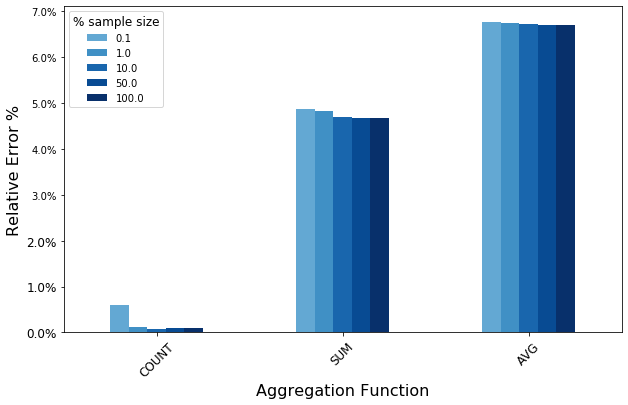

In [202]:
variant = "% sample size"
fig1, ax1 = plot_bar(model_based_results, variant=variant, value="error")
ax = format_barplot(ax1)
plt.show()

## On Response Time

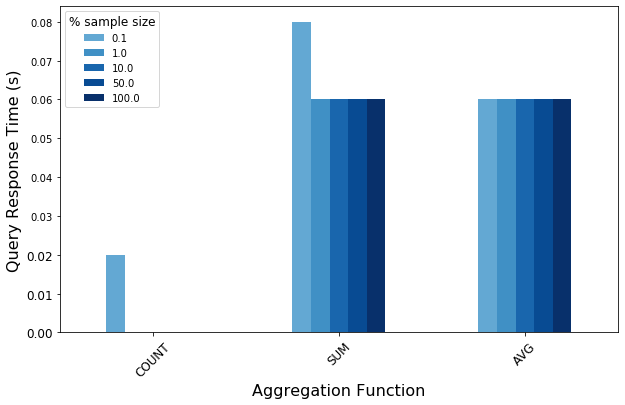

In [204]:
fig2, ax2 = plot_bar(model_based_results, variant="% sample size", value="time")
ax2 = format_barplot(ax2, 'Query Response Time (s)')
# ax2.set_yscale('log')
plt.show()

## Response Time

In [210]:
model_based_results_plus_full_sample = model_based_results.copy()

In [211]:
model_based_results_plus_full_sample['100.0 (spark sql)'] = sample_based_results[1.0]

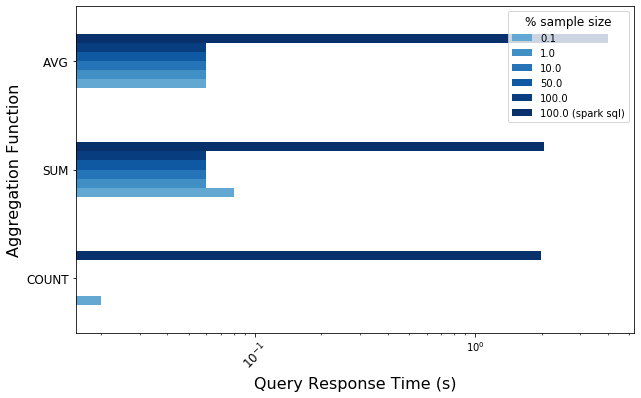

In [213]:
fig9, ax9 = plot_bar(model_based_results_plus_full_sample, value="time", _type="barh", n_elem=10)
ax9 = format_barplot(ax9, y_label="Aggregation Function", x_label='Query Response Time (s)')
ax9.set_xscale("log")

# Sensitivity Analysis: Sample-Based VS Model-Based

In [214]:
# Sample-based takes 9 mins
compared_objects = [0.001, 0.01, 0.1,0.5, 1.0]
# dir_name = "results/{}/sensitive_analysis_{}/sample_size/model_based/".format(mode, model)
dir_name = "results/{}/sensitive_analysis/sample_size/model_based/".format(mode, model)
dir_ = root + dir_name 
subdir_error = "relative_error/"
subdir_time = "response_time/"
    
model_based_results = load_results(dir_, subdir_error, compared_objects)

# dir_name = "results/{}/sensitive_analysis_{}/sample_size/sample_based/".format(mode, model)
dir_name = "results/{}/sensitive_analysis/sample_size/sample_based/".format(mode, model)
dir_ = root + dir_name 
subdir_error = "relative_error/"
subdir_time = "response_time/"
    
sample_based_results = load_results(dir_, subdir_error, compared_objects)

In [215]:
def plot_sample_vs_model_methods(model_based_results, sample_based_results, variant="% sample size", value="error", figsize=(10, 6)):
    df_model = pd.concat({k: pd.DataFrame(v) for k, v in model_based_results.items()}).reset_index()
    df_model.columns = [variant, "AF", "error", "time"]
    df_model["METHOD"] = "MODEL"
    df_sample = pd.concat({k: pd.DataFrame(v) for k, v in sample_based_results.items()}).reset_index()
    df_sample.columns = [variant, "AF", "error", "time"]
    df_sample["METHOD"] = "SAMPLING"
    fulle_table = df_sample.append(df_model)
    groups = fulle_table.groupby([variant, "METHOD"]).mean().reset_index()
    ptable = pd.pivot_table(groups.loc[:, [variant, "METHOD", value]], index="METHOD", columns=variant, values=value)
    fig, ax = plt.subplots(figsize=figsize)
    cmap = mpl.cm.Blues(np.linspace(0,1,20))
    cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
    ptable.plot(kind="bar", cmap=cmap, figsize=figsize, ax=ax)

    return fig, ax

## Relative Error

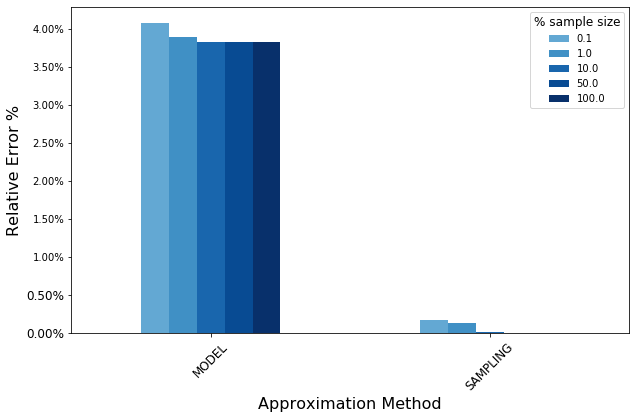

In [216]:
fig3, ax3 = plot_sample_vs_model_methods(model_based_results, sample_based_results)
ax3 = format_barplot(ax3, x_label="Approximation Method")
# ax.set_yscale("log")
# ax.set_ylabel('Relative Error %')
# plot_legend = list(map(lambda x: str(x * 100) + "% sample size", compared_objects))
# ax.legend(plot_legend, loc='upper right')
plt.show()

## Response Time

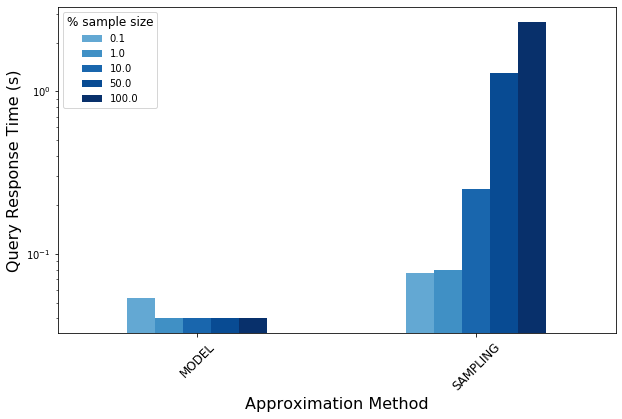

In [217]:
fig4, ax4 = plot_sample_vs_model_methods(model_based_results, sample_based_results, value='time')
ax4 = format_barplot(ax4, x_label="Approximation Method", y_label="Query Response Time (s)")
ax4.set_yscale("log")
plt.show()

## Relative Response Time

In [228]:
# Build the sample vs model based response time
def build_relative_response_time(model_based_results, sample_based_results):
    relative_response_time = {}
    for k in model_based_results:
        model_response_time = model_based_results[k]['time']
        sample_response_time = sample_based_results[k]['time']
        sample_size_response_time = {}
        for af in model_response_time:
            af_model_response_time = model_response_time[af]
            af_sample_response_time = sample_response_time[af]
            if k == 1.0 and af == "SUM":
                sample_size_response_time[af] = 40.0
            else:
                sample_size_response_time[af] = abs((af_sample_response_time - af_model_response_time) / af_sample_response_time) * 100.0
        relative_response_time[k] = sample_size_response_time
    return relative_response_time

relative_response_time = build_relative_response_time(model_based_results, sample_based_results)


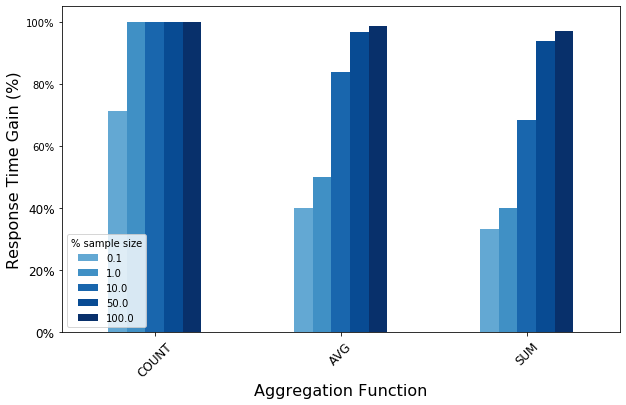

In [231]:
cmap = mpl.cm.Blues(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
fig8, ax8 = plt.subplots(figsize=(10, 6))
pd.DataFrame(relative_response_time).plot(kind="bar", cmap=plt.get_cmap(cmap, 5), ax=ax8)
ax8 = format_barplot(ax8, 'Response Time Gain (%)')
ax8.legend(title="% sample size", loc="lower left")
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

# Influence of Query Range

In [238]:
# Process 6 min
compared_objects = [0.001, 0.01, 0.1,0.5, 1.0]
root = "../../../"
# dir_name = "results/{}/sensitive_analysis_{}/query_range/".format(mode, model)
dir_name = "results/{}/sensitive_analysis/query_range/".format(mode, model)
dir_ = root + dir_name 
subdir_error = "relative_error/"
subdir_time = "response_time/"

query_range_results = load_results(dir_, subdir_error, compared_objects)
query_range_results

{0.1: {'error': {'COUNT': 0.97, 'AVG': 7.74, 'SUM': 42.7},
  'time': {'COUNT': 0.02, 'AVG': 0.06, 'SUM': 0.08}},
 1.0: {'error': {'COUNT': 0.02, 'AVG': 23.79, 'SUM': 17.89},
  'time': {'COUNT': 0.0, 'AVG': 0.06, 'SUM': 0.06}},
 10.0: {'error': {'COUNT': 0.03, 'AVG': 7.68, 'SUM': 11.16},
  'time': {'COUNT': 0.0, 'AVG': 0.06, 'SUM': 0.06}},
 50.0: {'error': {'COUNT': 0.07, 'AVG': 2.88, 'SUM': 3.48},
  'time': {'COUNT': 0.0, 'AVG': 0.06, 'SUM': 0.06}},
 100.0: {'error': {'COUNT': 0.72, 'AVG': 0.61, 'SUM': 0.11},
  'time': {'COUNT': 0.0, 'AVG': 0.06, 'SUM': 0.06}}}

## On Relative Error

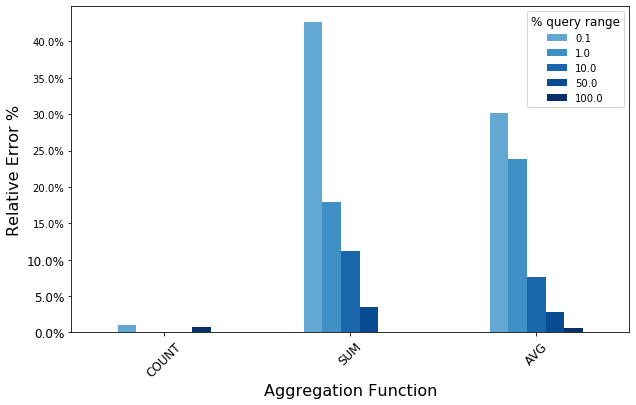

In [244]:
variant="% query range"
fig5, ax5 = plot_bar(query_range_results, variant=variant, value="error")
ax5 = format_barplot(ax5, variant=variant)
# ax5.set_yscale("log")
plt.show()

## On Response Time

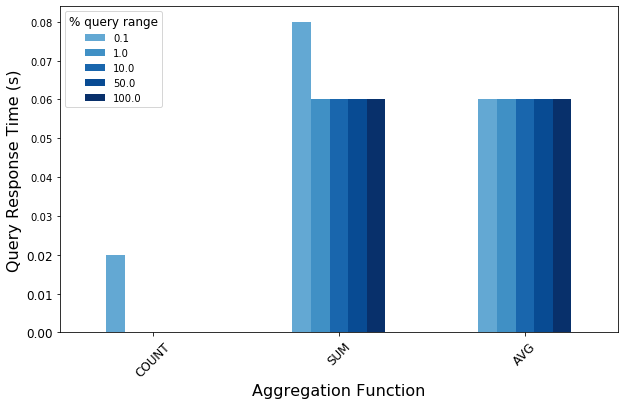

In [221]:
fig6, ax6 = plot_bar(query_range_results, variant="% query range", value="time")
ax6 = format_barplot(ax6, "Query Response Time (s)", variant=variant)
plt.show()

# Training Overheads

In [160]:
dir_name = "results/{}/overhead_analysis/".format(mode)
dir_ = root + dir_name 
subdir_space = "space_overhead/"
subdir_time = "training_time/"

space_file_name = "space_overhead_vs_sample_size.json"
time_file_name = "time_vs_sample_size.json"

def format_overhead(data, scale=1e-6): 
    tmp = data.copy()
    final = {}
    for k in tmp:
        key = float(k)
        final[key] = tmp[k] * scale
    return final

def load_overheads(dir_, subdir_space, subdir_time, space_file_name, time_file_name):
    with open(dir_ + subdir_space + space_file_name) as infile:
            space_overhead = format_overhead(json.load(infile), 1e-6)
        
    with open(dir_ + subdir_time + time_file_name) as infile:
                time_overhead = format_overhead(json.load(infile), 1e-9)
    results = {}
    for k in space_overhead:
        results[k] = {"space": space_overhead[k], "time": time_overhead[k]}
    return dict(sorted(results.items()))

training_overhead_results = load_overheads(dir_, subdir_space, subdir_time, space_file_name, time_file_name)

## Training Time & Space Overhead

In [161]:
def plot_overheads(results):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Prepare Data
    sample_size = list(map(lambda x: x * 100, list(results.keys())))
    space_overhead = list(map(lambda x: x["space"], results.values()))
    time_overhead = list(map(lambda x: x["time"], results.values()))

    # Draw Training Time
    ax.plot(sample_size, time_overhead, "-o")
    ax.set_xscale("log")
    ax.set_xlabel("Sample size (%)", fontsize=label_fontsize)
    ax.set_ylabel("Training Time (s)", fontsize=label_fontsize)
    ax.legend(["DBest"], title_fontsize=title_fontsize, fontsize=title_fontsize)

#     # Draw Space Overhead
#     axes[1].plot(sample_size, space_overhead, "-o")
#     axes[1].set_xscale("log")
#     axes[1].set_xlabel("Sample size (%)")
#     axes[1].set_ylabel("Space Overhead (MB)")
#     axes[1].legend(["DBest"])

    for xtick, ytick in zip(ax.xaxis.get_major_ticks(), ax.yaxis.get_major_ticks()):
            xtick.label.set_fontsize(tick_fontsize) 
            ytick.label.set_fontsize(tick_fontsize)
    return fig, ax

In [246]:
# fig7, ax7 = plot_overheads(training_overhead_results)
# plt.show()

# Save plots

In [245]:
dir_path = root + "plots/"
# fig1.savefig(dir_path + "_" + model + "fig1", bbox_inches='tight')
# fig2.savefig(dir_path + "_" + model + "fig2", bbox_inches='tight')
# fig3.savefig(dir_path + "_" + model + "fig3", bbox_inches='tight')
# fig4.savefig(dir_path + "_" + model + "fig4", bbox_inches='tight')
fig5.savefig(dir_path + "_" + model + "fig5", bbox_inches='tight')
# fig6.savefig(dir_path + "_" + model + "fig6", bbox_inches='tight')
# fig7.savefig(dir_path + "_" + model + "fig7", bbox_inches='tight')
fig8.savefig(dir_path + "_" + model + "fig8", bbox_inches='tight')
fig9.savefig(dir_path + "_" + model + "fig9", bbox_inches='tight')